## Entrenamiento de un modelo YOLOv8 para detección de arboles

Este notebook tiene como objetivo entrenar un modelo YOLOv8 personalizado para detectar arboles en un conjunto de imágenes. Se utilizará la biblioteca `ultralytics` y un dataset con imágenes anotadas.

Antes de empezar, nos aseguramos que se tiene acceso a la GPU con el comando `nvidia-smi` . 

In [ ]:
!nvidia-smi

## 1. Importación de librerías necesarias

Importamos las librerías requeridas para entrenar y visualizar los resultados del modelo.


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Instalar YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## 2. Descomprimir el dataset

El dataset sigue la estructura esperada por YOLOv8.

Cada imagen tiene una etiqueta en formato YOLO (`.txt`) con coordenadas de bounding boxes normalizadas.

In [ ]:
!unzip datasets.zip

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trees-Dataset-2 in yolov8:: 100%|██████████| 168/168 [00:00<00:00, 5506.70it/s]


## 3. Entrenamiento del modelo

Se utiliza el modelo `yolov8n.pt` preentrenado para realizar *fine-tuning* sobre nuestro dataset personalizado.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={HOME}/content/datasets/Trees-Dataset-2/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 410MB/s]
New https://pypi.org/project/ultralytics/8.3.158 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Trees-Dataset-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

## 4. Evaluación del modelo

Después del entrenamiento, evaluamos el rendimiento sobre el conjunto de validación.

In [ ]:
!ls {HOME}/runs/detect/train/

/content


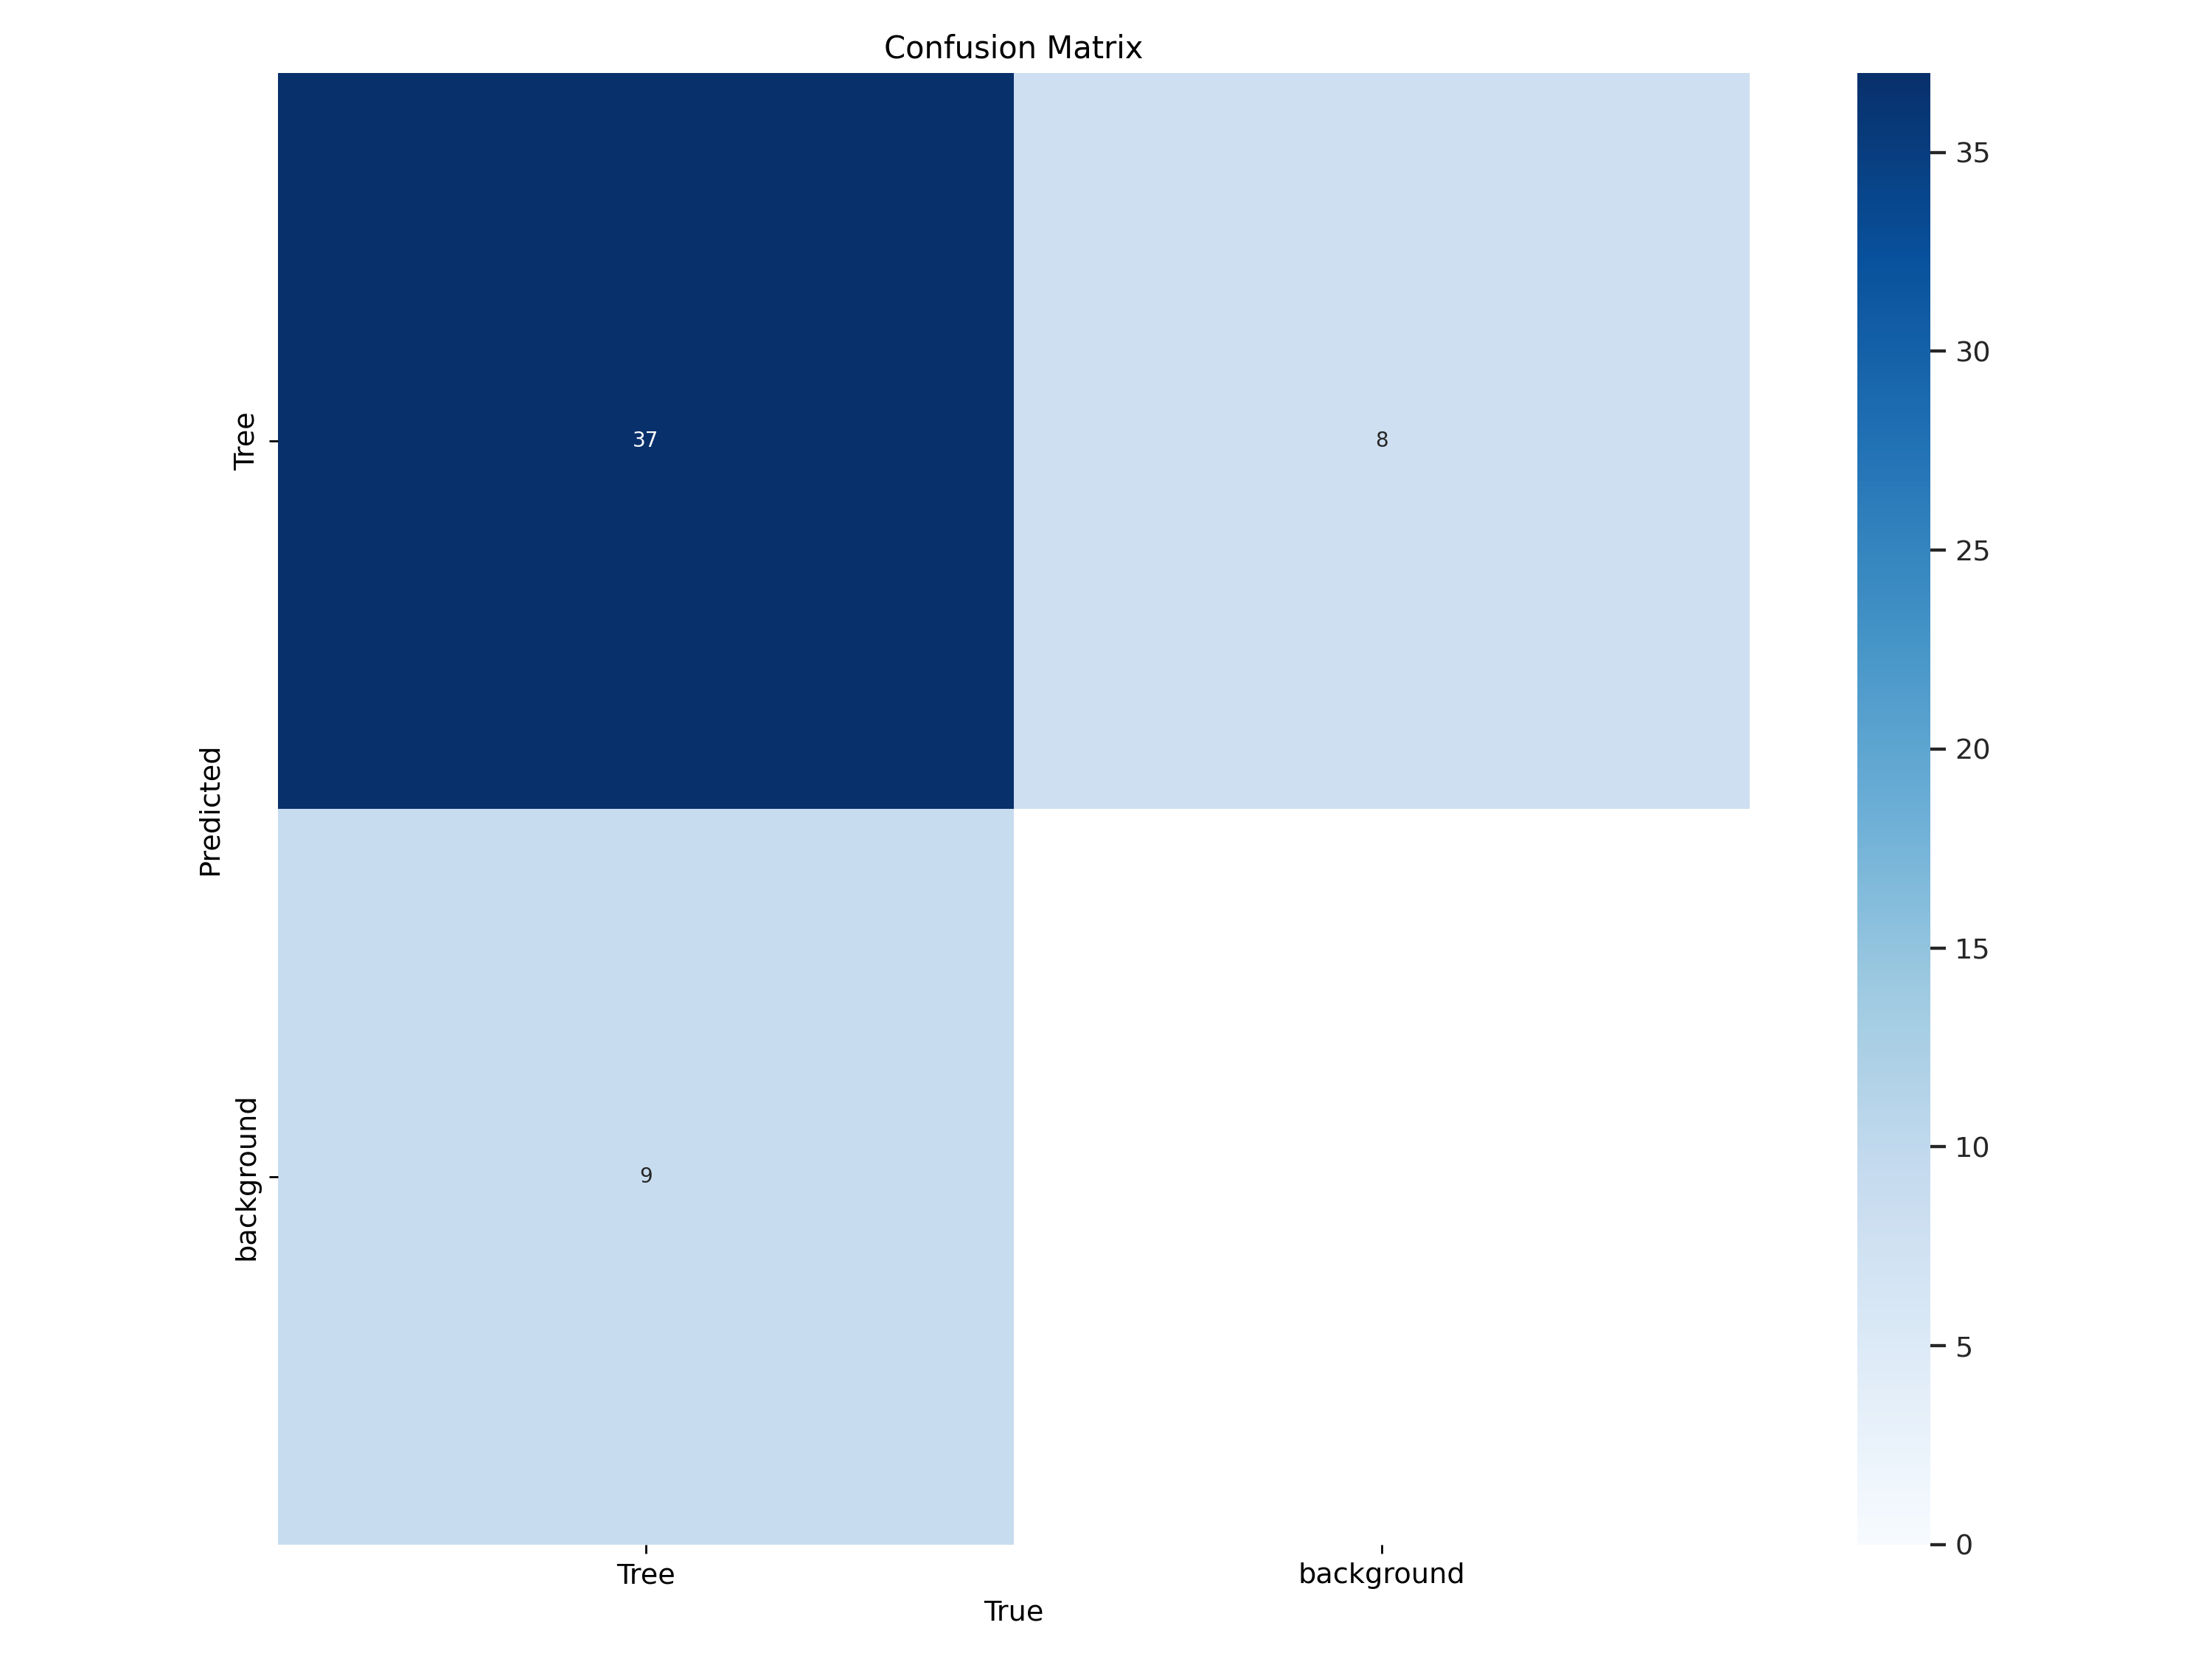

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


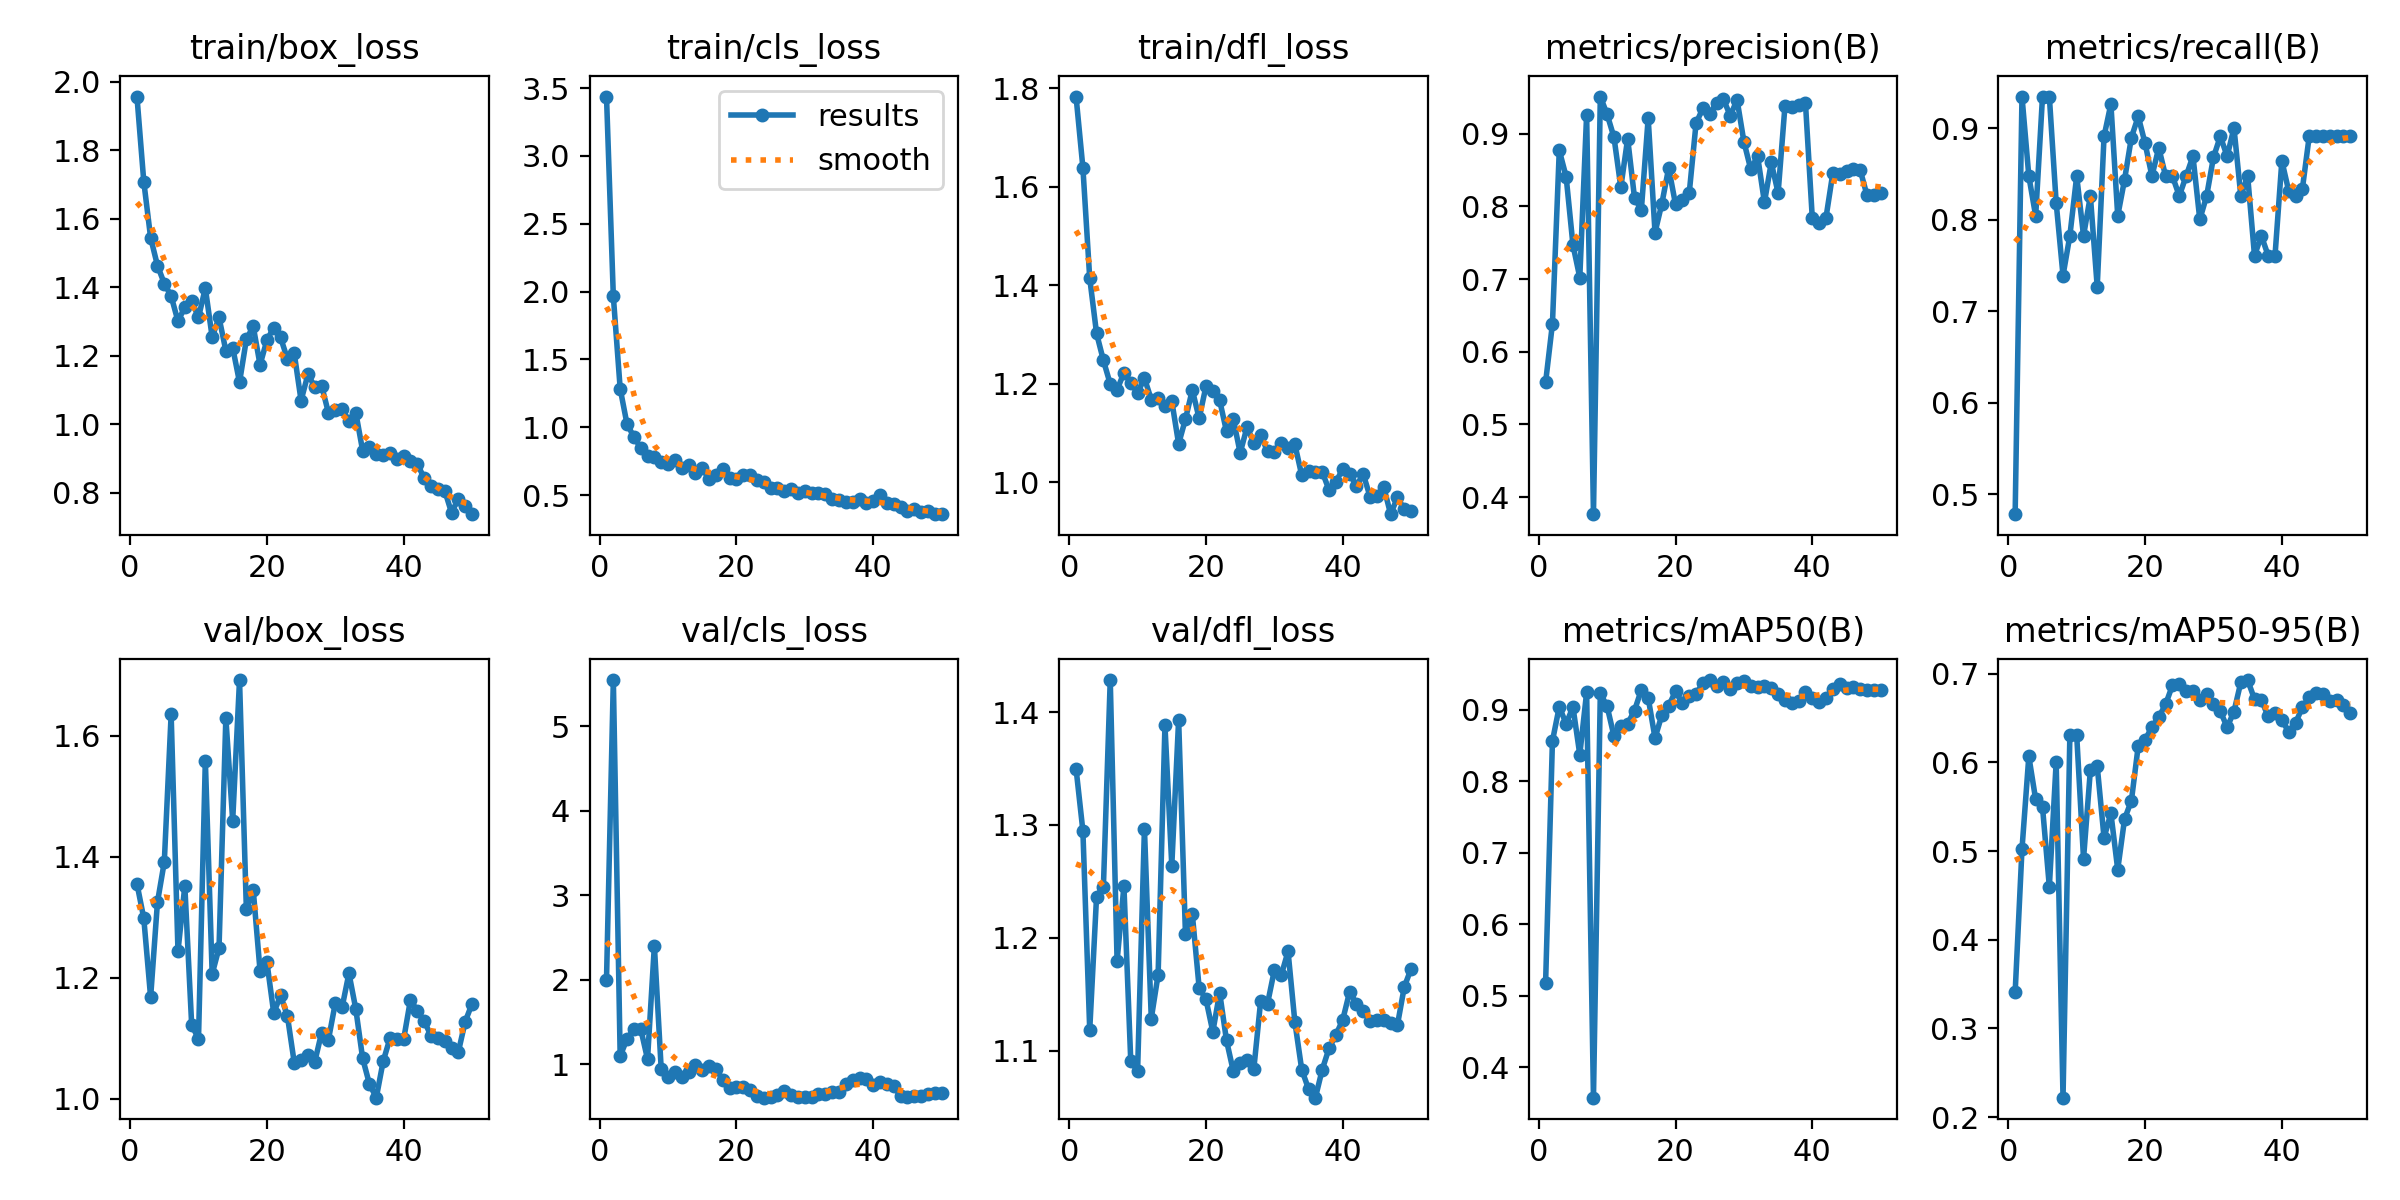

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## 5. Visualización de predicciones

Se muestran ejemplos de imágenes de prueba con las predicciones del modelo ya entrenado.

/content


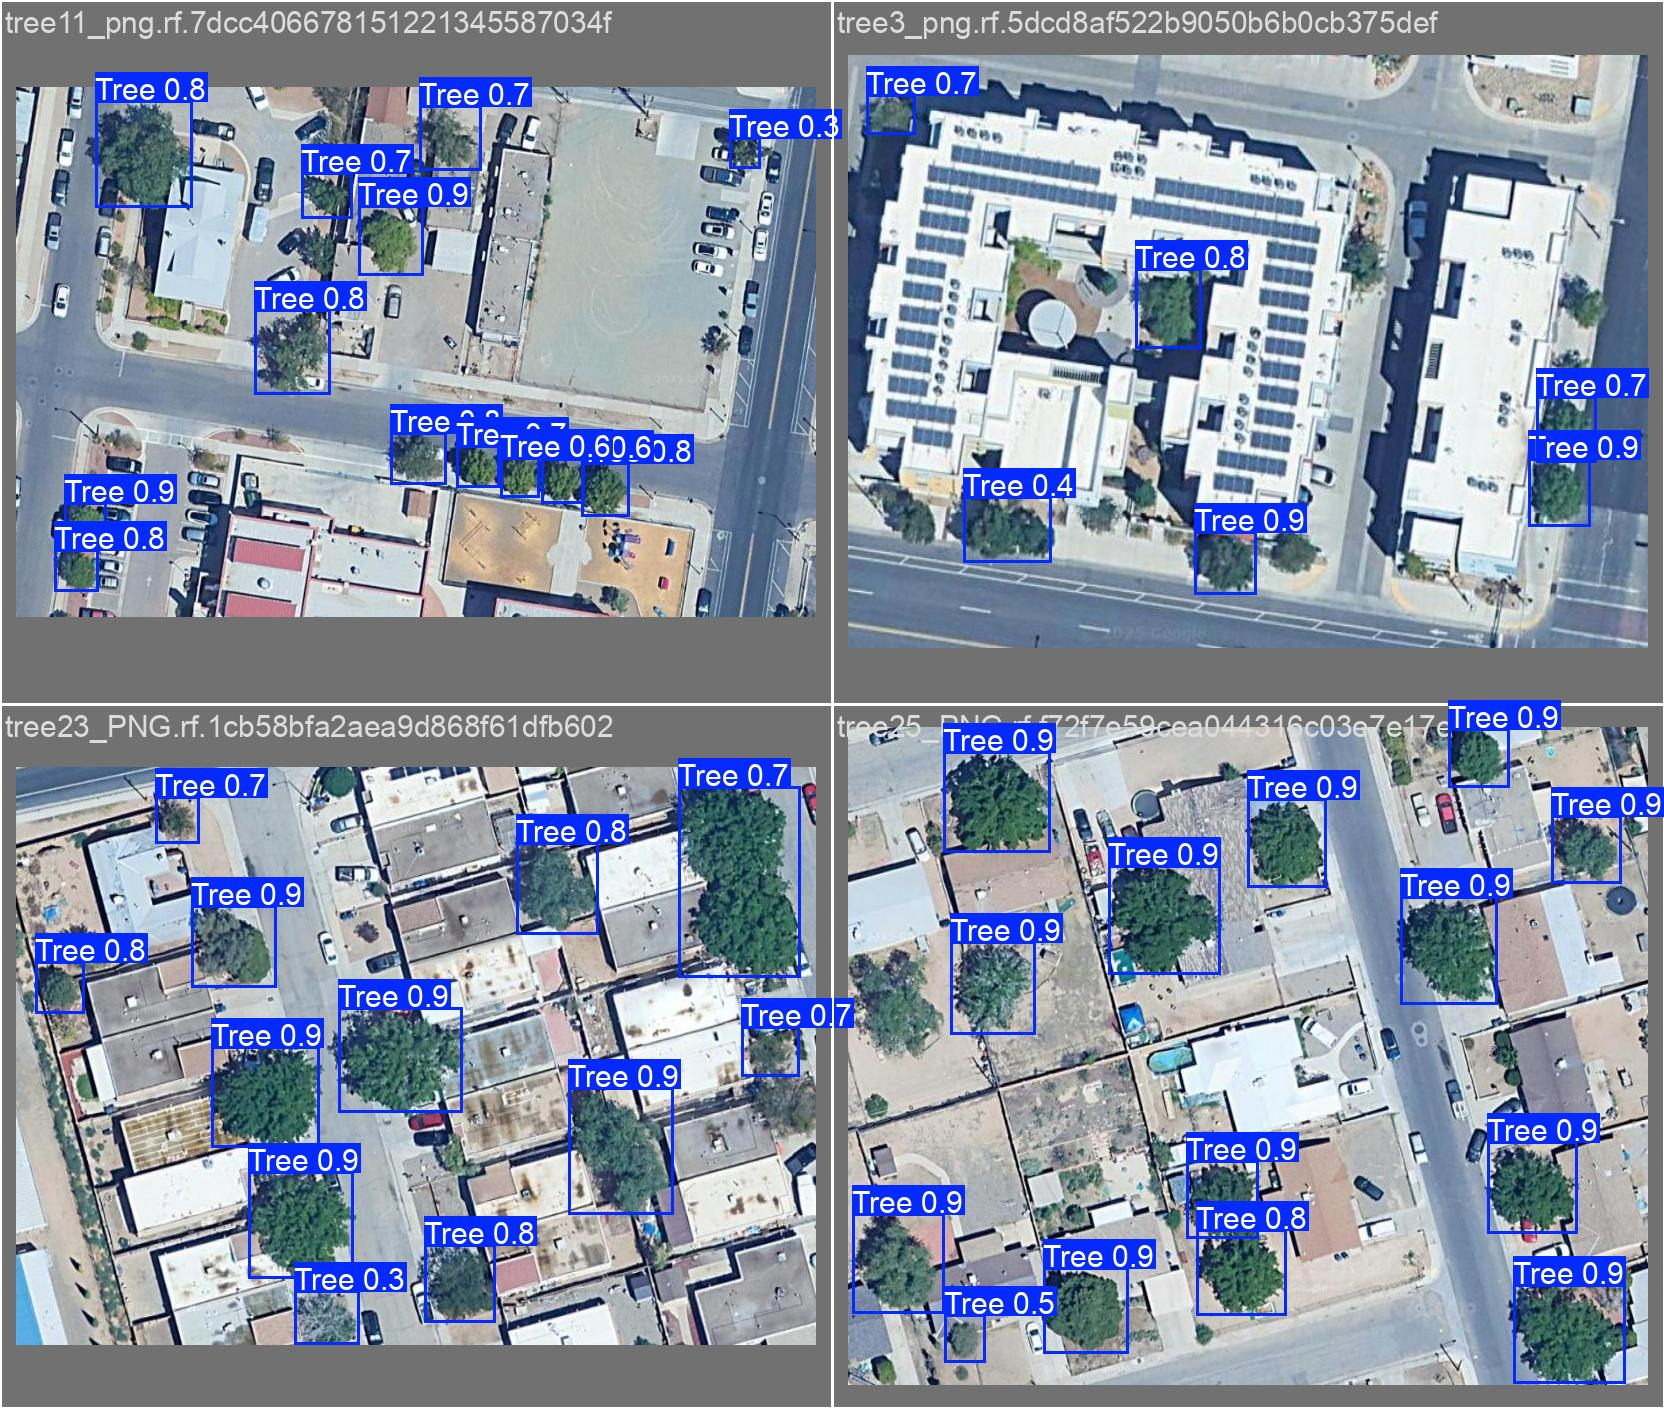

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## 6. Comprimir pesos del modelo entrenado

Una vez finalizado el entrenamiento, comprimimos la carpeta que contiene los pesos del modelo en un archivo `.zip`. Lo que facilitará su descarga y almacenamiento para usos futuros.


In [ ]:
!zip -r weights.zip {HOME}/runs/detect/train/weights/

  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
